# Try to find the relationship between dataset
#### Find correlation between data  (ex: date, time, price,etc)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

#### Find the correlation or autocorrelation between price and quantity sold in hobbies item

In [2]:
hobbies_sales_price = pd.read_csv('final_sell_calendar_hobbies.csv')

In [134]:
returns = hobbies_sales_price[['date','amount','sell_price']]

In [135]:
returns = returns.copy()

In [136]:
returns['date'] = pd.to_datetime(returns['date'])

In [137]:
returns['sell_price']= np.log(returns['amount'])
returns['sell_price'] = np.log(returns['sell_price'])

/Users/chloeang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/chloeang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [138]:
returns = returns.set_index(returns.columns[0])

In [139]:
returns.loc[:, 'sell_price'] = returns['sell_price'].pct_change()
returns.loc[:, 'amount'] = returns['amount'].pct_change()

In [140]:
returns

,amount,sell_price
date,,
2013-07-13,NaN,NaN
2013-07-14,NaN,NaN
2013-07-15,NaN,NaN
2013-07-16,NaN,NaN
2013-07-17,NaN,NaN
...,...,...
2011-02-28,NaN,0.0
2011-03-01,NaN,0.0
2011-03-02,NaN,0.0


In [141]:
correlation = returns['amount'].corr(returns['sell_price'])
correlation 

nan

In [142]:
hobbies_sales_price

,Unnamed: 0,id,wm_yr_wk,sell_price,d,year,month,wday,date,amount,number
0,0,HOBBIES_1_001_CA_1,11325,9.58,d_897,2013,7,1,2013-07-13,0,897
1,1,HOBBIES_1_001_CA_1,11325,9.58,d_898,2013,7,2,2013-07-14,0,898
2,2,HOBBIES_1_001_CA_1,11325,9.58,d_899,2013,7,3,2013-07-15,0,899
3,3,HOBBIES_1_001_CA_1,11325,9.58,d_900,2013,7,4,2013-07-16,0,900
4,4,HOBBIES_1_001_CA_1,11325,9.58,d_901,2013,7,5,2013-07-17,0,901
...,...,...,...,...,...,...,...,...,...,...,...
8642680,8642680,HOBBIES_2_148_WI_3,11105,0.97,d_31,2011,2,3,2011-02-28,0,31
8642681,8642681,HOBBIES_2_148_WI_3,11105,0.97,d_32,2011,3,4,2011-03-01,0,32
8642682,8642682,HOBBIES_2_148_WI_3,11105,0.97,d_33,2011,3,5,2011-03-02,0,33
8642683,8642683,HOBBIES_2_148_WI_3,11105,0.97,d_34,2011,3,6,2011-03-03,0,34


#### Find the correlation or autocorrelation between price and quantity sold in foods item

In [69]:
foods_sales_price = pd.read_csv('final_sell_calendar_foods.csv')

In [113]:
foods_sales_price_returns = foods_sales_price[['date', 'sell_price','amount']]

In [114]:
foods_sales_price_returns =foods_sales_price_returns.copy()

In [115]:
foods_sales_price_returns['date'] = pd.to_datetime(foods_sales_price_returns['date'])

In [116]:
foods_sales_price_returns = foods_sales_price_returns.sort_values(by='date')

In [117]:
foods_sales_price_returns ['sell_price']= np.log(foods_sales_price_returns['sell_price'])
foods_sales_price_returns ['amount']= np.log(foods_sales_price_returns['amount'])

/Users/chloeang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [119]:
foods_sales_price_returns = foods_sales_price_returns.set_index(foods_sales_price_returns.columns[0])

In [121]:
foods_sales_price_returns = foods_sales_price_returns.pct_change()

In [124]:
foods_sales_price_returns.reset_index(inplace = True, drop = False)

In [125]:
foods_sales_price_returns

,date,sell_price,amount
0,2011-01-29,NaN,NaN
1,2011-01-29,-1.187138,-1.000000
2,2011-01-29,0.000000,-0.321061
3,2011-01-29,-2.745581,0.671950
4,2011-01-29,2.061244,-inf
...,...,...,...
21395948,2016-04-24,-1.000000,-inf
21395949,2016-04-24,inf,-1.000000
21395950,2016-04-24,-0.505462,-inf
21395951,2016-04-24,-1.090581,NaN


In [123]:
corr_foods = foods_sales_price_returns['amount'].corr(foods_sales_price_returns['sell_price'])
corr_foods 

nan

In [129]:
autocorrelation = foods_sales_price_returns['amount'].autocorr()

In [132]:
print(autocorrelation)

nan


In [144]:
from statsmodels.tsa.seasonal import STL

In [147]:
foods_sales_price_returns.set_index('date', inplace=True)

In [180]:
monthly_data = foods_sales_price_returns['amount'].resample('W').mean()

In [181]:
monthly_data

date
2011-01-30   NaN
2011-02-06   NaN
2011-02-13   NaN
2011-02-20   NaN
2011-02-27   NaN
              ..
2016-03-27   NaN
2016-04-03   NaN
2016-04-10   NaN
2016-04-17   NaN
2016-04-24   NaN
Freq: W-SUN, Name: amount, Length: 274, dtype: float64

In [182]:
stl = STL(monthly_data, seasonal=7)  # Specify seasonal period (e.g., 12 for monthly data)
result = stl.fit()


# Get components: trend, seasonal, and residual
trend = result.trend
seasonal = result.seasonal
residual = result.resid

In [183]:
trend = result.trend
seasonal = result.seasonal
residual = result.resid

In [184]:
seasonal_df = seasonal.to_frame()

In [185]:
seasonal_df.reset_index(inplace= True)

In [186]:
seasonal_df['season'].nunique()

0

In [187]:
foods_sales_price_returns

,sell_price,amount
date,,
2011-01-29,NaN,NaN
2011-01-29,-1.187138,-1.000000
2011-01-29,0.000000,-0.321061
2011-01-29,-2.745581,0.671950
2011-01-29,2.061244,-inf
...,...,...
2016-04-24,-1.000000,-inf
2016-04-24,inf,-1.000000
2016-04-24,-0.505462,-inf


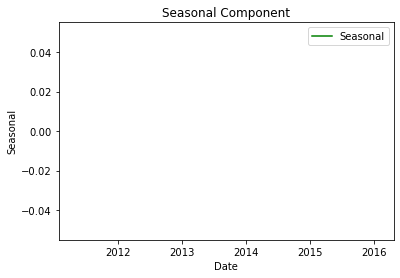

In [188]:
plt.plot(foods_sales_price_returns.index[:len(seasonal)] ,seasonal, label='Seasonal', color='green')
plt.xlim(foods_sales_price_returns.index[0], foods_sales_price_returns.index[-1])
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.legend()
plt.show()


In [190]:
sales = pd.read_csv('sales_train_validation.csv')
calendar = pd.read_csv('calendar.csv')
prices = pd.read_csv('sell_prices.csv')

/var/folders/7h/s4cspbv95x98l3h5nvklx3ym0000gn/T/ipykernel_31723/3923374585.py:22: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif t == np.object:


In [ ]:
prices

In [192]:
sales

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [193]:
df = pd.melt(sales, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name='d', value_name='sold').dropna()

In [197]:
df

KeyboardInterrupt: 